In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from collections import defaultdict
from pathlib import Path

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

* [1. Data Pre-Processing](#DPP)
    
    * [1.1. Extracting Data](#extract)
    
    * [1.2. Clearing MetaData](#ClearMD)
    
* [2. Creating a Baseline](#Baseline)

<a class="anchor" id="DPP">

## 1. Data Preprocessing

</a>

<a class="anchor" id="extract">

### 1.1. Extracting Data
</a>

In [5]:
import sys 
!{sys.executable} -m pip install git+https://github.com/textpipe/textpipe.git


  Cloning https://github.com/textpipe/textpipe.git to c:\users\laran\appdata\local\temp\pip-req-build-0w8d542c
  Using cached https://files.pythonhosted.org/packages/52/6d/044789e730141bcda2a7368836f714684a7d13bd44a2a33b387cb31b4335/cld2-cffi-0.1.4.tar.gz


  Running command git clone -q https://github.com/textpipe/textpipe.git 'C:\Users\laran\AppData\Local\Temp\pip-req-build-0w8d542c'
    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\laran\\AppData\\Local\\Temp\\pip-install-boigd_k3\\cld2-cffi\\setup.py'"'"'; __file__='"'"'C:\\Users\\laran\\AppData\\Local\\Temp\\pip-install-boigd_k3\\cld2-cffi\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base pip-egg-info
         cwd: C:\Users\laran\AppData\Local\Temp\pip-install-boigd_k3\cld2-cffi\
    Complete output (8 lines):
    running egg_info
    creating pip-egg-info\cld2_cffi.egg-info
    writing pip-egg-info\cld2_cffi.egg-info\PKG-INFO
    writing dependency_links to pip-egg-info\cld2_cffi.egg-info\dependency_links.txt
    writing

In [6]:
def create_df_from_txt(author):
    my_dir_path = "Data/Corpora/train/" + author

    results = defaultdict(list)
    for file in Path(my_dir_path).iterdir():
        with open(file, "r",encoding = 'utf8') as file_open:
            results["id"] = file.name
            results["text"].append(file_open.read())
            results["author"] = author
    df = pd.DataFrame(results)
    
    return df

In [7]:
def join_df(authors):

    df = pd.DataFrame()
    for a in range(len(authors)):
        df = df.append(create_df_from_txt(authors[a]))
        
    return df 

In [8]:
authors = ['AlmadaNegreiros','CamiloCasteloBranco','EcaDeQueiros','JoseRodriguesSantos','JoseSaramago','LuisaMarquesSilva']
authors_sigla = ['AN','CCB','EQ','JRS','JS','LMS']

In [9]:
#The training data frame
traindf = join_df(authors)
#Replacing the name of the authors with labels of their initials
for i in range(0,len(authors)):
    traindf.author = traindf.author.replace(authors[i],authors_sigla[i])
traindf

,id,text,author
0,pg23961.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN
1,pg23961.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN
2,pg23961.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN
3,pg23961.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN
4,pg23961.txt,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,AN
...,...,...,...
4,UltimaHistoria.txt,Título\ne-medo\n\nAutora (inspiradíssima)\nLuí...,LMS
5,UltimaHistoria.txt,"LISBOA 2050\nLisboa, ano de 2050. Um Agosto tã...",LMS
6,UltimaHistoria.txt,Título\nUm passeio pelo inferno\n\nAutora\nLuí...,LMS
7,UltimaHistoria.txt,Título\nRapsódia sem dó (maior)\n\nAutora\nLuí...,LMS


<a class="anchor" id="clearMD">

### 1.2. Clearing MetaData
</a>

The majority of the .txt files have metadata at the beginning. This is unnecessary and may introduce noise in our model, as such it may be a good idea to remove it. 

In [10]:
import spacy

Testing with just one of the .txt:

In [11]:
test = traindf.iloc[0:1]
test

,id,text,author
0,pg23961.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN


In [12]:
def set_custom_boundaries(doc):
    # Adds support to use '\n\n\n' as the delimiter for sentence detection
    for token in doc[:-1]:
        if token.text == '\n\n\n':
            doc[token.i+1].is_sent_start = True
    return doc


nlp = spacy.load('en_core_web_sm',disable=["parser"])
nlp.add_pipe(set_custom_boundaries)
custom_sentences = nlp(test.iloc[0,1])
custom_sentences = list(custom_sentences.sents)

i=0
for sentence in custom_sentences:
    print('**SPACE', i, '**', sentence)
    i +=1
#nlp_pt = spacy.load('pt_core_news_sm')

**SPACE 0 ** Title: A Scena do Odio

Author: José de Almada Negreiros

Release Date: September 16, 2007 [EBook #22615]

Language: Portuguese




A ALVARO DE CAMPOS

_Excerptos de um poema desbaratado
que foi escripto durante os
três dias e as três noites que durou
a revolução de 14 de Maio de 1915._



**SPACE 1 ** Satanizo-Me Tara na Vara de Moysés!
O castigo das serpentes é-Me riso nos dentes,
Inferno a arder o Meu cantar!
Sou Vermelho-Niagára dos sexos escancarados nos chicotes dos cossacos!
Sou Pan-Demonio-Trifauce enfermiço de Gula!
Sou Genio de Zarathustra em Taças de Maré-Alta!
Sou Raiva de Medusa e Damnação do Sol!

Ladram-Me a Vida por vivê-La
e só me deram Uma!
Hão-de lati-La por sina!
agora quero vivê-La!
Hei-de Poeta cantá-La em Gala sonora e dina!
Hei-de Gloria desannuviá-La!
Hei-de Guindaste içá-La Esfinge
da Valla commum onde Me querem rir!
Hei-de trovão-clarim levá-La Luz
ás Almas-Noites do Jardim das Lagrymas!
Hei-de bombo rufá-La pompa de Pompeia
nos Funeraes de Mim!


In [13]:
text_nometa = custom_sentences[1]

In [14]:
#WIP.... 
#Works for a few of the .txt files if the meta data is just at the beginning but not if there are too many large spaces (/n/n/n) or if there are spaces between the text

<a class="anchor" id="Baseline">

## 2. Creating a Baseline
    
</a>

Our goal now is to create a naíve baseline to compare our model with. It won't involve any pre-processing of data or removal of extra meta data.

1st Try: Using DummyClassifier as a baseline? 

In [15]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [16]:
X = traindf.iloc[:,1]
y = traindf.iloc[:,2]
dummy_clf = DummyClassifier(strategy="most_frequent") #stratified
dummy_clf.fit(X, y)
#DummyClassifier(strategy='stratified')
dummy_clf.predict(X)


array(['CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB',
       'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB',
       'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB',
       'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB',
       'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB',
       'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB',
       'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB', 'CCB'],
      dtype='<U3')

In [17]:
dummy_clf.score(X, y)

0.31746031746031744

Too stupid of a baseline? 

## Choosing Evaluation Metrics

Can we use Accuracy as an evaluation metric? Depends if the dataset is unbalanced. Let's check:

In [18]:
traindf.iloc[:,2].value_counts()

CCB    20
JS     12
LMS     9
AN      9
JRS     8
EQ      5
Name: author, dtype: int64

It is unbalanced in favour of Camilo Castelo Branco which is why we get a higher accuracy when we use the DummyClassifier with most frequent strategy (0.31) compared to other strategies (stratified 0.22) even though it's just classifying all texts as belonging to CCB. As such accuracy may not be the best metric in this case.

## Word Cloud

To see a word cloud - or the most frequent words - written by a given author just type in the function one of the following siglas: 


In [37]:
authors_sigla

['AN', 'CCB', 'EQ', 'JRS', 'JS', 'LMS']

Corresponding to the following authors:

In [38]:
authors

['AlmadaNegreiros',
 'CamiloCasteloBranco',
 'EcaDeQueiros',
 'JoseRodriguesSantos',
 'JoseSaramago',
 'LuisaMarquesSilva']

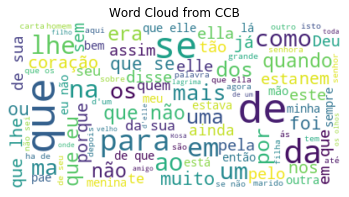

In [39]:
def word_cloud(author):
    word_cloud = " ".join(traindf[traindf['author']==author]['text'])


    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(word_cloud)
    # Display the generated image:
    plt.figure()
    plt.title('Word Cloud from ' + author)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


word_cloud('CCB')

WILL NEED TO REMOVE STOP WORDS FIRST BEFORE IT MAKES ANY SENSE 